In [49]:
#imported from hw1
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

#basic correlation function
df = pd.read_csv('EE627A_HW1_Data.csv', header=0)
data = df.iloc[:, 1::]
data.corr()

#first four-factor correlation & RF
dc = df[['Mkt-RF', 'SMB', 'HML','RF', 'Mom' ]]
dc.corr()
    

#convert data to series
MKTRF_Series = data['Mkt-RF'].squeeze()
SMB_Series = data['SMB'].squeeze()
HML_Series = data['HML'].squeeze()
RF_Series = data['RF'].squeeze()
Mom_Series = data['Mom'].squeeze()

#new dataframe for first 5 col
new_df = pd.DataFrame(data = {
    'Mkt-RF': [],
    'SMB': [],
    'HML': [],
    'RF': [],
    'Mom': []
})

#compute autocorr and append to new df using series conversion
for i in range(11):
     new_df = new_df.append({
         'Mkt-RF': MKTRF_Series.autocorr(lag=i),
         'SMB': SMB_Series.autocorr(lag=i),
         'HML': HML_Series.autocorr(lag=i),
         'RF': RF_Series.autocorr(lag=i),
         'Mom': Mom_Series.autocorr(lag=i)
     },
         ignore_index = True)

#print(dc)
#pd.plotting.autocorrelation_plot(new_df)
#print (new_df)
#print('\nFor the four-factor model, Mkt-RF correlates most highly with every industry. Mom correlates negatively with each industry')
#print('\nRF does not correlate highly with the 30 industry time series. It is close to uncorrelated for most of them')

#plot_acf(MKTRF_series, alpha=1, lags=20)
df_stationarityTest = adfuller(df['Mkt-RF'], autolag='AIC')
#print("P-value: ", df_stationarityTest[1])
new_df
#print('\n based on the P-value above, the first column is stationary (<0.05), and since the plot below follows an exponential decay, there is an AR(1) model in the series')

,Mkt-RF,SMB,HML,RF,Mom
0,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.538767,0.181205,0.078444,0.385678,0.076150
2,0.311438,-0.138087,-0.566225,0.379039,0.190134
3,0.192926,-0.237403,-0.091411,0.079919,0.160320
4,-0.038368,-0.227750,0.001836,0.572369,-0.048704
5,0.079526,0.028412,0.027075,0.001376,0.012745
6,-0.066185,-0.270374,0.074835,0.273039,0.189619
7,-0.207892,-0.140559,-0.094099,-0.012596,-0.314257
8,-0.091080,0.046298,-0.039770,0.007937,0.145516
9,-0.203056,-0.120721,0.135602,0.220136,-0.031519


In [50]:
#make each column a PC by transforming using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_transform = scaler.fit_transform(new_df)
#this standardizes the data
data_transform

array([[ 2.47516309,  2.8964102 ,  2.68113867,  2.39199797,  2.7637021 ],
       [ 1.1688614 ,  0.48710048,  0.16565816,  0.43038046, -0.09103398],
       [ 0.52502393, -0.45241996, -1.59403105,  0.40918234,  0.26118213],
       [ 0.18937257, -0.74465858, -0.29797894, -0.54595043,  0.16905562],
       [-0.46569669, -0.71625314, -0.04344974,  1.02651203, -0.47683806],
       [-0.13179649,  0.0375049 ,  0.02544067, -0.79674952, -0.2869574 ],
       [-0.54447929, -0.84167591,  0.1558078 ,  0.07070895,  0.25959047],
       [-0.94582037, -0.4596933 , -0.30531526, -0.8413623 , -1.29740914],
       [-0.61498491,  0.09013346, -0.15701939, -0.77579688,  0.12331057],
       [-0.93212247, -0.40131956,  0.32167693, -0.09821738, -0.42373623],
       [-0.72352077,  0.1048714 , -0.95192784, -1.27070525, -1.00086608]])

In [51]:
from sklearn.decomposition import PCA
#instantiate the PCA class with 2 components
pca = PCA(n_components = 2)
pca_transform = pca.fit_transform(data_transform)

In [52]:
print(pca_transform.shape)
print(data_transform.shape)
#reduced columns from 5 to 2

(11, 2)
(11, 5)


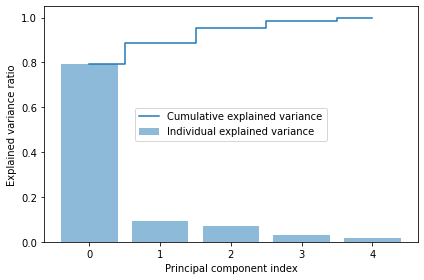

In [53]:
#total variance explained = (lambda1 + lambda 2) / (lambda1...lambdaN)
import numpy as np
pca = PCA().fit(new_df) 
exp_var_pca = pca.explained_variance_ratio_ #can only use explained_variance_ratio_ with .fit
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='center')
plt.tight_layout()
plt.show()

In [54]:
print("PC1: ", exp_var_pca[0])
print("PC2: ", exp_var_pca[1])
print("As it can be seen above, PC1 accounts for 75% of the covariance matrix, which makes sense since its variance should be maximal")

PC1:  0.7912284453682369
PC2:  0.0946958946488332
As it can be seen above, PC1 accounts for 75% of the covariance matrix, which makes sense since its variance should be maximal


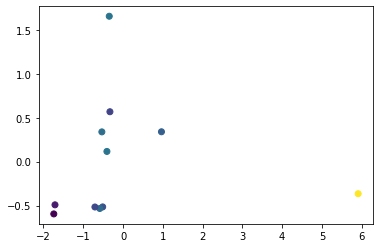

In [55]:
plt.scatter(pca_transform[:,0], pca_transform[:,1], c=new_df['Mom']) #Principal 1 & 2 plotted
#Not enough data points

In [56]:
#Sources:
#https://vitalflux.com/pca-explained-variance-concept-python-example/
#https://inst.eecs.berkeley.edu/~ee127/sp21/livebook/l_sym_pca.html
#https://nickmccullum.com/python-machine-learning/principal-component-analysis-python/